### Import Libraries

In [1]:
from datetime import datetime

import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Loading Global Fixed Tiles est. 2020 JAN

In [4]:
internet_dir = "..\data\internet\\jan2020_fixed_tiles\gps_fixed_tiles.shp"
tiles = gp.read_file(internet_dir)

### Plot Global Fixed Internet Speeds

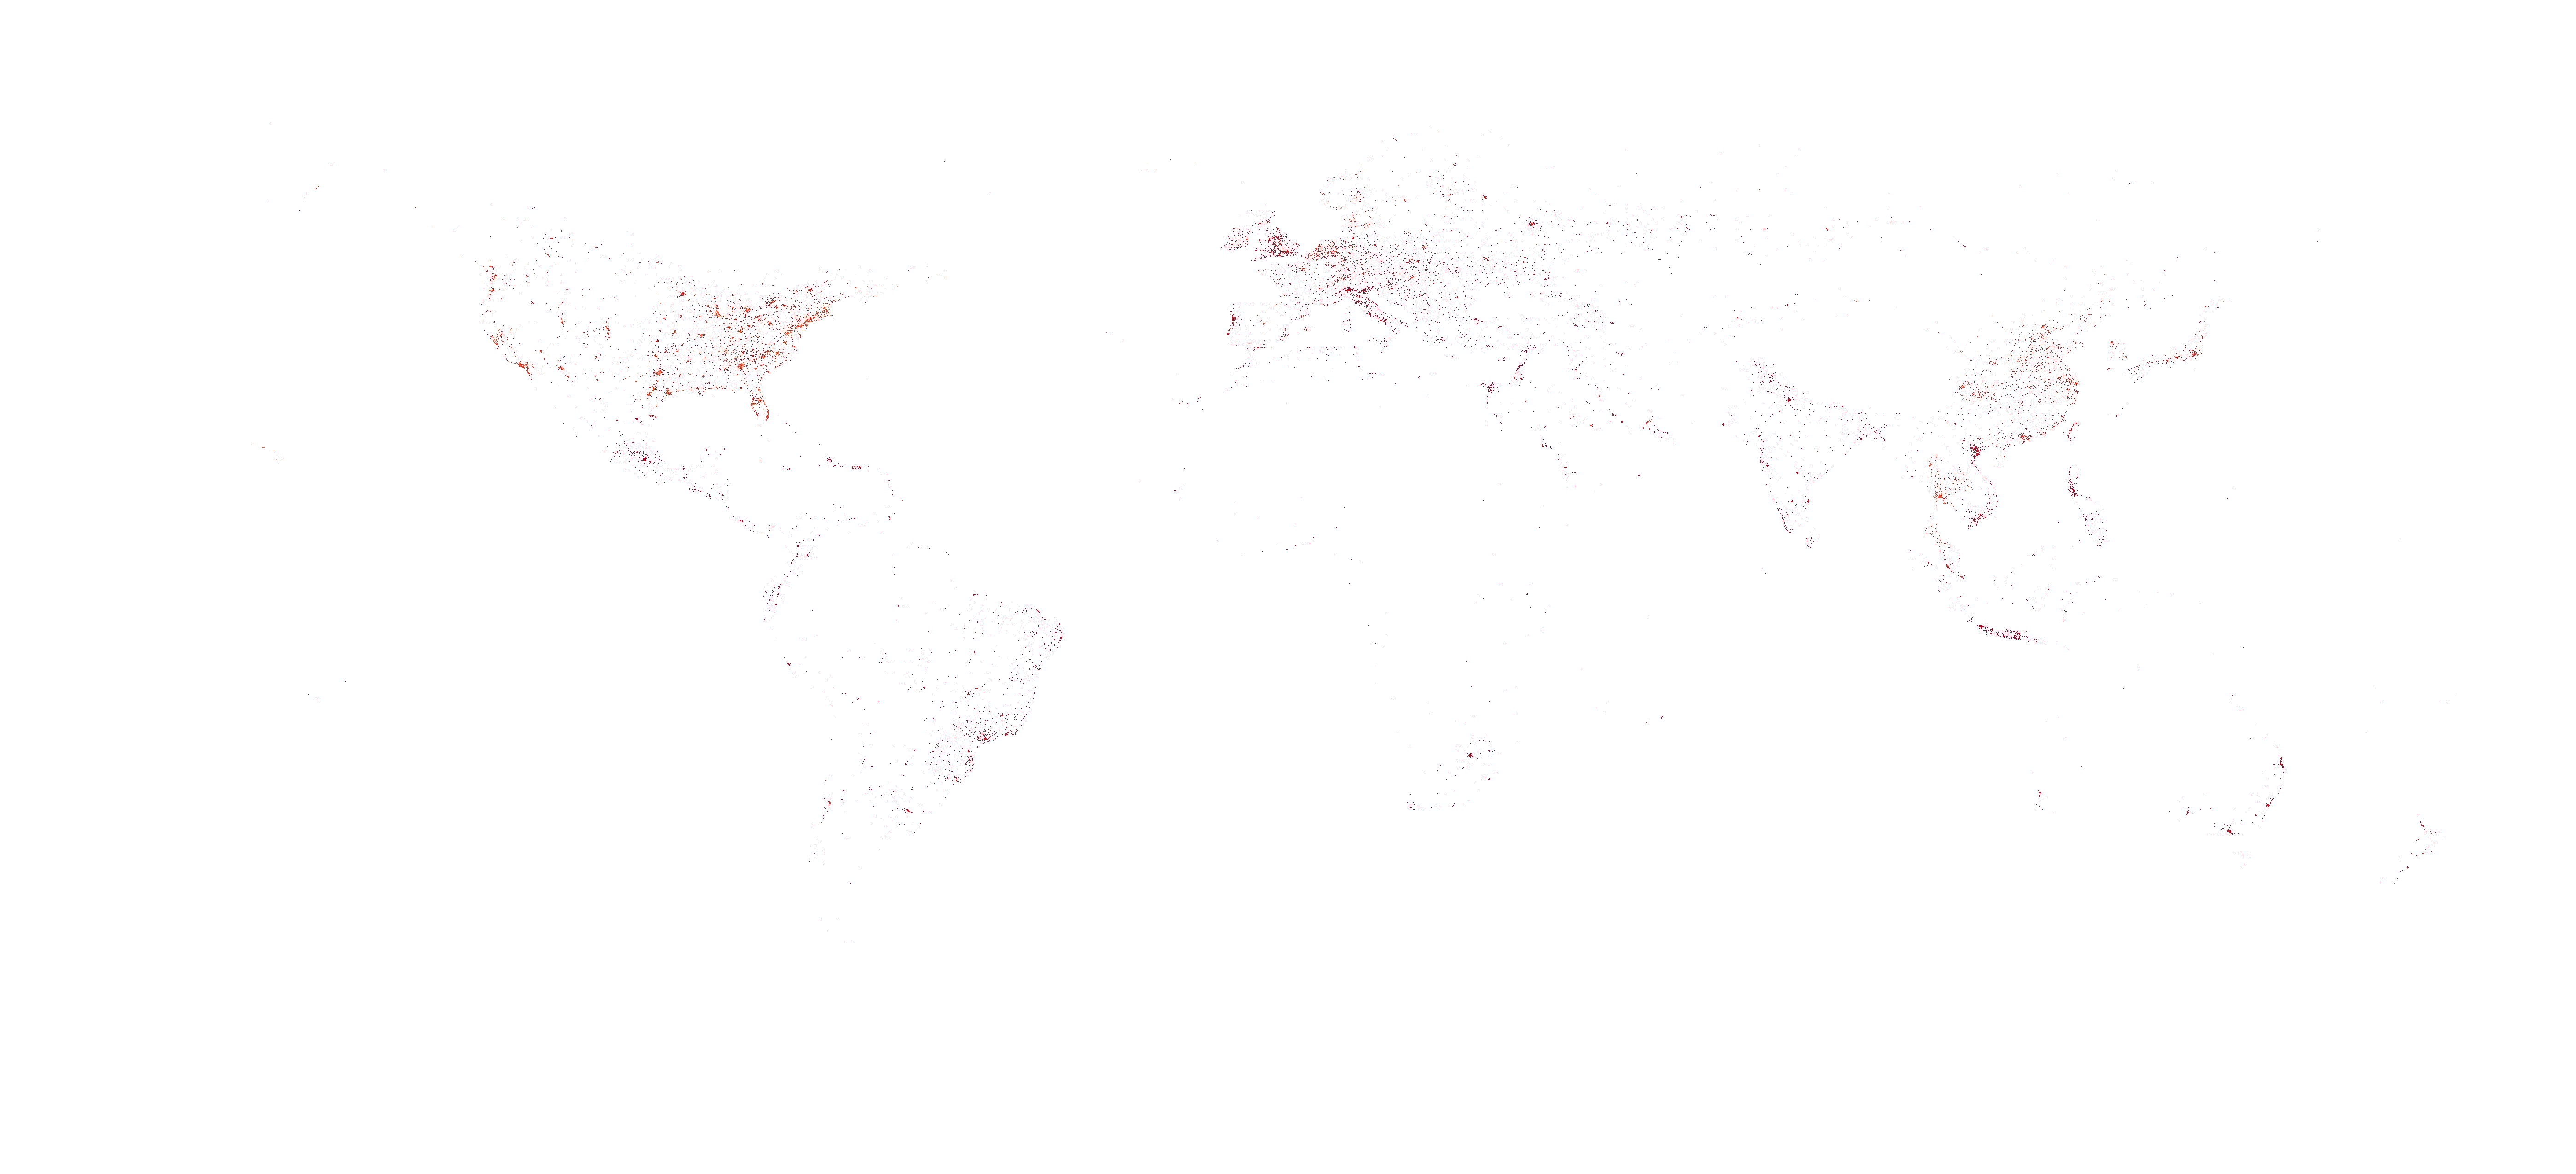

In [5]:
fig, ax = plt.subplots(figsize=(100, 100))
tiles.plot(ax=ax, column='avg_d_kbps', cmap='RdYlGn', legend=False)
plt.axis('off')
plt.show()

### Loading in Third Level Administrative Divisions Shapefile in Philippines

In [5]:
ph_dir = '..\data\internet\\thirdlevel_admin_div_PH\PHL_adm3.shp'
ph_tiles = gp.read_file(ph_dir)

### Merging Spatial Join for 3rd Level Admin.Div. and Internet Speeds

In [6]:
tiles_in_ph = gp.sjoin(tiles, ph_tiles, how='inner', op='within')
tiles_in_ph.shape

(17709, 23)

In [10]:
fig, ax = plt.subplots(figsize=(200, 200))
ax.set_facecolor('yellow')
tiles_in_ph.plot(ax=ax, column='avg_d_kbps', cmap='coolwarm', legend=False)
centroids_.plot(ax=ax, color='red', alpha=0.1)
plt.axis('off')
plt.show()

In [10]:
# tiles_in_ph = gp.sjoin(tiles, ph_tiles, how='right', op='within')
# tiles_in_ph.shape

(51940, 23)

In [11]:
tiles_in_ph.to_file('../data/internet/ph_internet_level3admindiv/ph_fixedinternet_level3admindiv.shp')

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_9780/290988598.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tiles_in_ph.to_file('../data/internet/ph_internet_level3admindiv/ph_fixedinternet_level3admindiv.shp')


### Loading in Centroids Positions

In [8]:
centroids_dir = '../data/ndhs/ndhs-centroids/DHS Clusters Points.shp'
centroids_ = gp.read_file(centroids_dir)

### Loading Global Mobile Tiles est. 2020 JAN

In [22]:
mobile_dir = '../data/internet/jan2020_mobile_tiles/gps_mobile_tiles.shp'
mobile_net = gp.read_file(mobile_dir)
mobile_net_ph = gp.sjoin(mobile_net, ph_tiles, how='inner', op='within')

In [12]:
whole_ph_dir = '../data/internet/philippine_boundary/PHL_adm0.shp'
whole_ph = gp.read_file(whole_ph_dir)

whole_ph_net = gp.sjoin(tiles, whole_ph, how='inner', op='within') 

In [13]:
whole_ph_net.to_file('../data/internet/ph_internet_whole/ph_fixedinternet_whole.shp')

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_9780/1935204173.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  whole_ph_net.to_file('../data/internet/ph_internet_whole/ph_fixedinternet_whole.shp')


In [36]:
whole_ph_net.set_geometry(whole_ph_net.to_crs(4326).geometry.centroid)
centroids_.set_geometry(centroids_.to_crs(4326).geometry.centroid)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_9780/3233043020.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  whole_ph_net.set_geometry(whole_ph_net.to_crs(4326).geometry.centroid)
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_9780/3233043020.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_.set_geometry(centroids_.to_crs(4326).geometry.centroid)


,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,ALT_GPS,ALT_DEM,area,num_roads,num_trunk,num_primar,dist_trunk,dist_prima,geometry,Centroid
0,PH201700000387,PH,2017,387,NULL,NULL,NULL,NULL,NULL,1,...,9999,10,12.305506,75.0,NaN,8.0,2638.30820,362.13367,POINT (120.56851 18.20219),POINT (120.56851 18.20219)
1,PH201700000405,PH,2017,405,NULL,NULL,NULL,NULL,NULL,1,...,9999,13,12.347941,236.0,5.0,7.0,441.11920,770.42729,POINT (120.39513 17.57604),POINT (120.39513 17.57604)
2,PH201700000416,PH,2017,416,NULL,NULL,NULL,NULL,NULL,1,...,9999,8,12.410673,232.0,3.0,5.0,796.88301,1006.57572,POINT (120.30959 16.60828),POINT (120.30959 16.60828)
3,PH201700000419,PH,2017,419,NULL,NULL,NULL,NULL,NULL,1,...,9999,43,12.398222,3.0,NaN,NaN,2805.59284,5335.33189,POINT (120.37831 16.80469),POINT (120.37831 16.80469)
4,PH201700000425,PH,2017,425,NULL,NULL,NULL,NULL,NULL,1,...,9999,10,12.438462,319.0,9.0,4.0,1068.87759,1596.86532,POINT (119.98818 16.16149),POINT (119.98818 16.16149)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,PH201700000722,PH,2017,722,NULL,NULL,NULL,NULL,NULL,17,...,9999,17,79.859768,52.0,NaN,15.0,54218.41902,23.19376,POINT (122.01480 12.48041),POINT (122.01480 12.48041)
1210,PH201700000723,PH,2017,723,NULL,NULL,NULL,NULL,NULL,17,...,9999,28,79.904095,5.0,NaN,2.0,44179.06072,2613.98131,POINT (121.94849 12.33211),POINT (121.94849 12.33211)
1211,PH201700000724,PH,2017,724,NULL,NULL,NULL,NULL,NULL,17,...,9999,105,79.754695,6.0,NaN,NaN,48923.48284,22699.02116,POINT (122.08204 12.82516),POINT (122.08204 12.82516)
1212,PH201700000725,PH,2017,725,NULL,NULL,NULL,NULL,NULL,17,...,9999,24,79.851913,9.0,NaN,3.0,73953.73552,42.46336,POINT (122.30896 12.50651),POINT (122.30896 12.50651)


In [37]:
from shapely.geometry import Point, Polygon, LineString

# change the crs between whole_ph_net (4326) and centroids (4683)
whole_ph_net.distance(centroids_)





C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_9780/2512504044.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  whole_ph_net.distance(centroids_)
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_9780/2512504044.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4683

  whole_ph_net.distance(centroids_)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
6687735   NaN
6687947   NaN
6688279   NaN
6688417   NaN
6688577   NaN
Length: 55636, dtype: float64

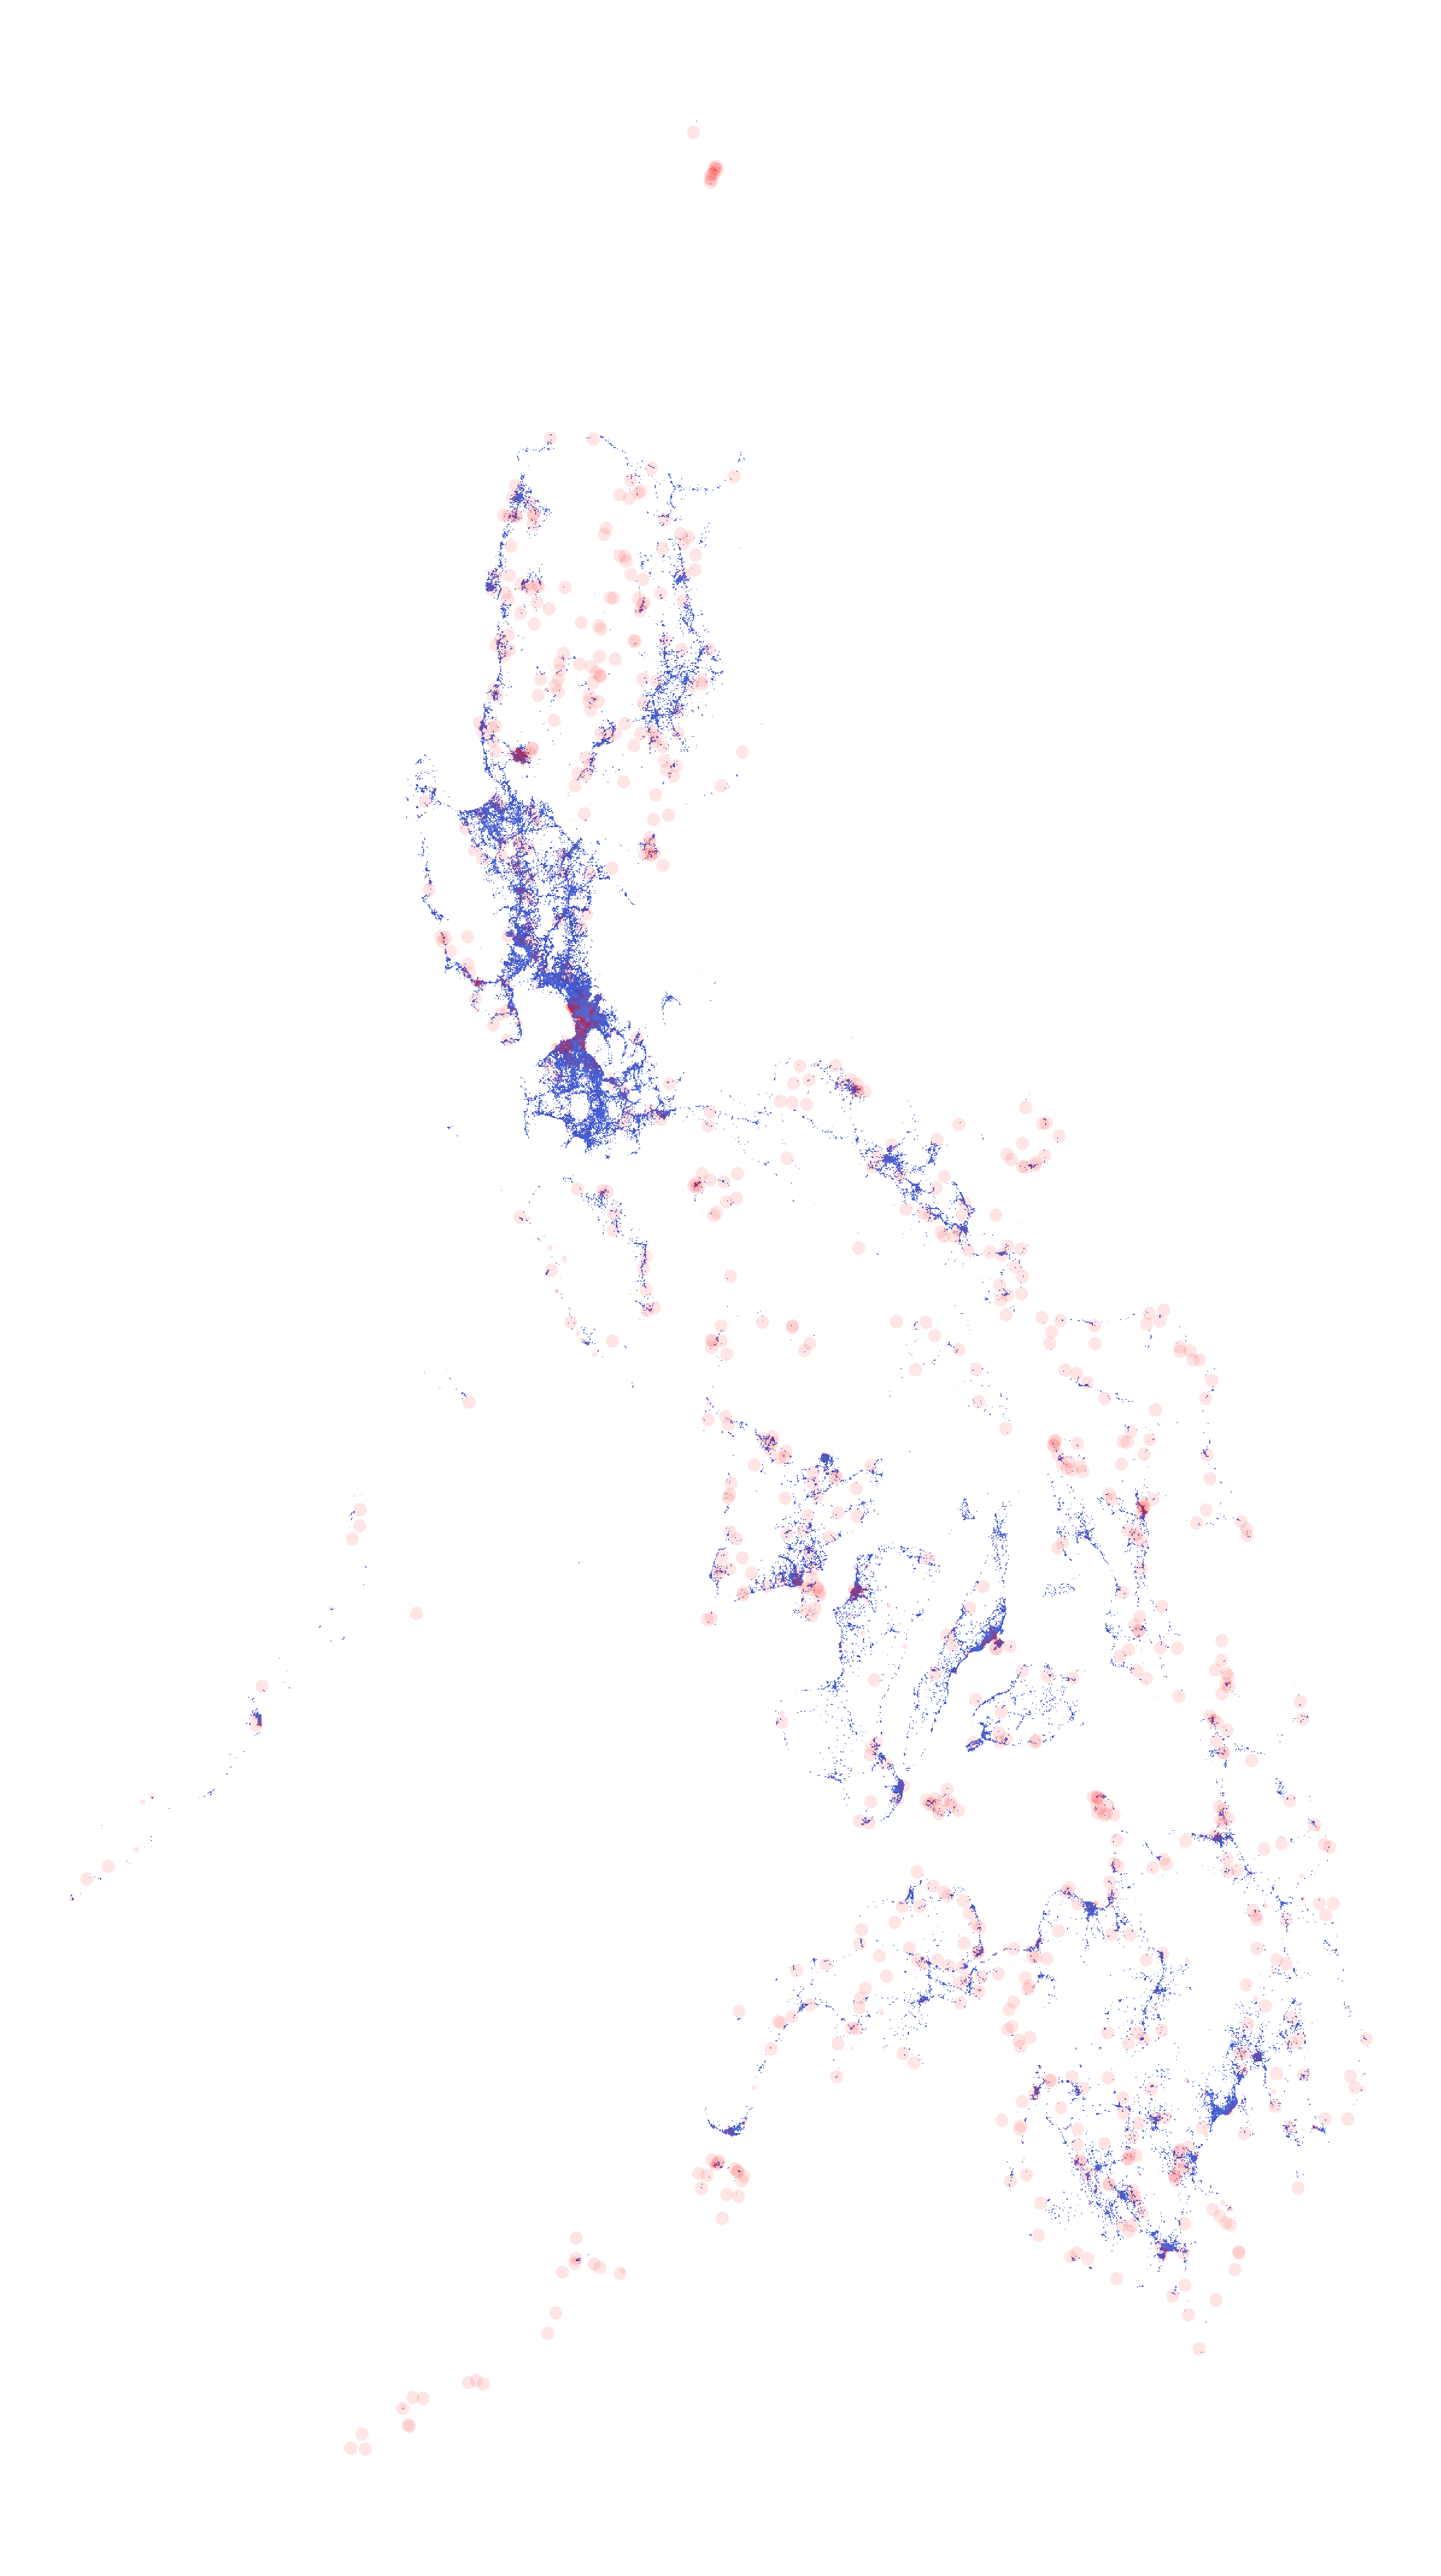

In [14]:
fig, ax = plt.subplots(figsize=(100, 100))
whole_ph_net.plot(ax=ax, column='avg_d_kbps', cmap='coolwarm', legend=False)
centroids_.plot(ax=ax, color='red', alpha=0.1)
plt.axis('off')
plt.show()